In [1]:
import pandas as pd

In [2]:
bio1 = pd.read_csv("api_data_aadhar_biometric_0_500000.csv")
bio2 = pd.read_csv("api_data_aadhar_biometric_500000_1000000.csv")
bio3 = pd.read_csv("api_data_aadhar_biometric_1000000_1500000.csv")
bio4 = pd.read_csv("api_data_aadhar_biometric_1500000_1861108.csv")

In [3]:
bio = pd.concat([bio1, bio2, bio3, bio4], ignore_index=True)

In [4]:
bio.head()
bio.info()
bio.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB


Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_'], dtype='object')

In [5]:
bio['date'] = pd.to_datetime(bio['date'], format='%d-%m-%Y')

In [6]:
bio[['bio_age_5_17','bio_age_17_']] = bio[['bio_age_5_17','bio_age_17_']].fillna(0)

In [7]:
bio['total_bio_updates'] = bio['bio_age_5_17'] + bio['bio_age_17_']
bio['adult_ratio'] = bio['bio_age_17_'] / (bio['bio_age_5_17'] + 1)

In [8]:
# Child vs Adult Biometric Pressure

age_split = bio[['bio_age_5_17', 'bio_age_17_']].sum()
age_split

# Insight --> Adult biometric updates significantly exceed child updates, indicating higher biometric instability among adults.
# This can be attributed to aging effects, manual labor, and authentication failures, making adults the primary drivers of biometric system load. 

bio_age_5_17    34226855
bio_age_17_     35536240
dtype: int64

In [9]:
# Regional Biometric Stress Hotspots

state_stress = (
    bio.groupby('state')['total_bio_updates']
    .sum()
    .sort_values(ascending=False)
)

state_stress.head(10)

# Insight --> Certain districts show disproportionately high biometric update volumes, signaling localized biometric stress. 
# These regions likely require alternative authentication mechanisms or additional service infrastructure.

state
Uttar Pradesh     9577735
Maharashtra       9226139
Madhya Pradesh    5923771
Bihar             4897587
Tamil Nadu        4698117
Rajasthan         3994955
Andhra Pradesh    3714592
Gujarat           3196514
Chhattisgarh      2648729
Karnataka         2635954
Name: total_bio_updates, dtype: int64

In [10]:
# District-Level Hidden Inequality

district_stress = (
    bio.groupby(['state','district'])['total_bio_updates']
    .sum()
    .sort_values(ascending=False)
)

district_stress.head(10)

# Insight --> Even within the same state, biometric stress varies sharply across districts,
# indicating micro-level inequality in biometric reliability and service accessibility.

state           district  
Maharashtra     Pune          605762
                Nashik        576606
                Thane         571273
                Jalgaon       417384
Gujarat         Ahmedabad     405490
Maharashtra     Mumbai        404359
                Ahmadnagar    363561
Rajasthan       Jaipur        355884
Maharashtra     Nagpur        350923
Andhra Pradesh  Kurnool       350633
Name: total_bio_updates, dtype: int64

In [11]:
# Lifecycle Transition Signal

transition = (
    bio.groupby('district')['adult_ratio']
    .mean()
    .sort_values(ascending=False)
)

transition.head(10)

# Insight --> Districts with high adult-to-child biometric ratios reflect lifecycle-driven revalidation demand as children transition into adulthood, 
# making biometric stress predictable rather than random.

district
North East                       13.862089
Buldana                           6.148051
ManendragarhChirmiriBharatpur     5.626515
Garhwa *                          5.009743
Bid                               4.726145
Meluri                            4.111330
Mahabub Nagar                     3.601010
Dohad                             3.427368
Gadchiroli                        3.422195
Najafgarh                         3.381595
Name: adult_ratio, dtype: float64

In [12]:
# 3-month moving average forecast

forecast = monthly.rolling(window=3).mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(monthly.index.to_timestamp(), monthly.values, label='Actual')
plt.plot(forecast.index.to_timestamp(), forecast.values, 
         linestyle='--', label='Forecast (Moving Avg)')

plt.title("Monthly Biometric Update Trend with Forecast")
plt.xlabel("Month")
plt.ylabel("Total Biometric Updates")
plt.legend()
plt.show()


NameError: name 'monthly' is not defined

## Observation
Biometric update volumes fluctuate significantly across months

Clear peak and low-demand periods are visible

**Insight :-** Biometric system load is cyclical and predictable, not random

**Problem :-** Unplanned temporal peaks lead to operational stress and service delays

**Solution :-** Forecast monthly biometric demand, Plan staffing and infrastructure ahead of peak periods

**Impact :-** Smoother service delivery, Reduced system overload, Better citizen experience

In [ ]:
state_stress = (
    bio.groupby('state')['total_bio_updates']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

state_stress.plot(
    kind='bar',
    figsize=(10,5),
    title='Top 10 States by Biometric Update Volume',
    ylabel='Total Biometric Updates'
)


###  Graph: Top 10 States by Biometric Update Volume

**Problem:** 
Regional concentration of biometric system load.

**Insight**  
A small number of states account for a disproportionately large share of biometric updates, indicating uneven geographic distribution of system demand.

**Proposed Soluton:**  
Adopt state-specific infrastructure planning by deploying additional biometric resources and mobile units in high-load states rather than uniform national allocation.t

**mpact:**  
Improved service efficiency, reduced wait times, and optimized resource utilization in high-demand regions.


In [ ]:
# Child vs Adult Biometric Load

age_totals = bio[['bio_age_5_17','bio_age_17_']].sum()

age_totals.plot(
    kind='bar',
    title='Biometric Updates by Age Group',
    ylabel='Number of Updates',
    rot=0
)

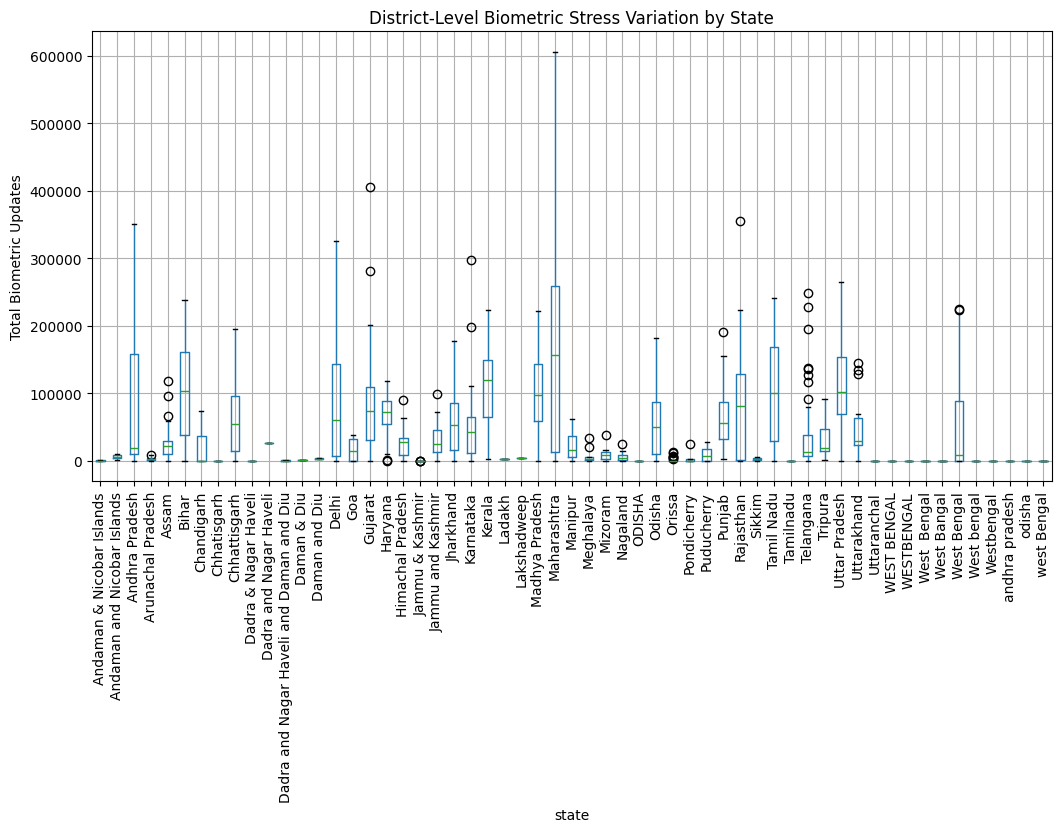

In [13]:
# District Inequality

import matplotlib.pyplot as plt

district_totals = (
    bio.groupby(['state','district'])['total_bio_updates']
    .sum()
    .reset_index()
)

district_totals.boxplot(
    column='total_bio_updates',
    by='state',
    figsize=(12,6),
    rot=90
)

plt.title("District-Level Biometric Stress Variation by State")
plt.suptitle("")
plt.ylabel("Total Biometric Updates")
plt.show()

###  Graph: District-Level Biometric Stress Variation by State

**Observation:**  
The boxplot reveals significant variation in biometric update volumes across districts within the same state. Several states exhibit extreme outliers, indicating localized biometric stress hotspots that are not visible in state-level averages.

**Implication:**  
State-level aggregation masks district-specific challenges, making micro-level planning essential for efficient biometric service delivery.


<Axes: title={'center': 'Top States by Adult-to-Child Biometric Ratio'}, xlabel='state', ylabel='Adult Ratio'>

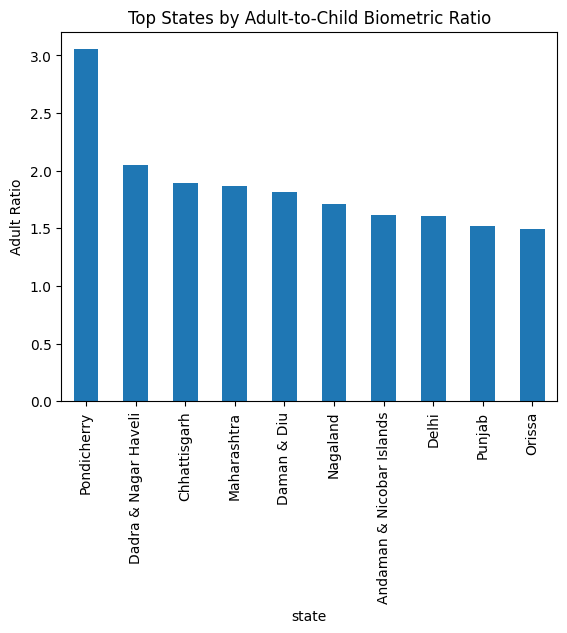

In [14]:
# Lifecycle Transition Ratio

transition_state = (
    bio.groupby('state')['adult_ratio']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

transition_state.plot(
    kind='bar',
    title='Top States by Adult-to-Child Biometric Ratio',
    ylabel='Adult Ratio'
)

###  Graph: Top States by Adult-to-Child Biometric Ratio

**Observation:**  
All highlighted states exhibit adult-to-child biometric ratios greater than one, indicating that adult biometric updates consistently exceed child updates. The variation across states suggests region-specific demographic and lifecycle-driven revalidation pressure.

**Implication:**  
Adult-dominated biometric demand requires age-adaptive authentication strategies and proactive revalidation planning.


<Axes: title={'center': 'Top PIN Codes by Biometric Update Volume'}, xlabel='pincode', ylabel='Total Updates'>

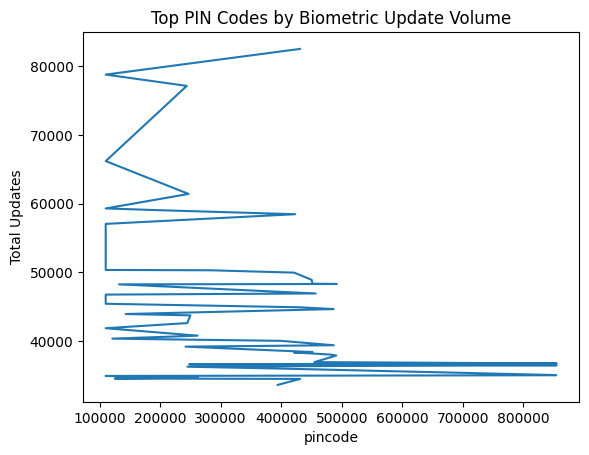

In [15]:
# PIN Code Concentration Curve

pincode_stress = (
    bio.groupby('pincode')['total_bio_updates']
    .sum()
    .sort_values(ascending=False)
)

pincode_stress.head(50).plot(
    kind='line',
    title='Top PIN Codes by Biometric Update Volume',
    ylabel='Total Updates'
)

###  Graph: Top PIN Codes by Biometric Update Volume

**Observation:**  
Biometric update activity is highly concentrated in a small number of PIN codes, indicating localized biometric service pressure that is not visible in state- or district-level aggregates.

**Implication:**  
PIN-level analysis is essential for identifying micro-level stress hotspots and enabling targeted service interventions.


In [16]:
# ML Model Goal: Detect abnormal biometric stress regions

from sklearn.ensemble import IsolationForest

features = bio[['bio_age_5_17','bio_age_17_']]

model = IsolationForest(contamination=0.03, random_state=42)
bio['risk_flag'] = model.fit_predict(features)

# Interpretation: -1 → abnormal stress , 1 → normal

# Insight --> The model identifies districts exhibiting abnormal biometric update behavior,
# serving as an early warning system for authentication failure or operational bottlenecks.

<Axes: title={'center': 'Normal vs Abnormal Biometric Regions'}, xlabel='risk_flag'>

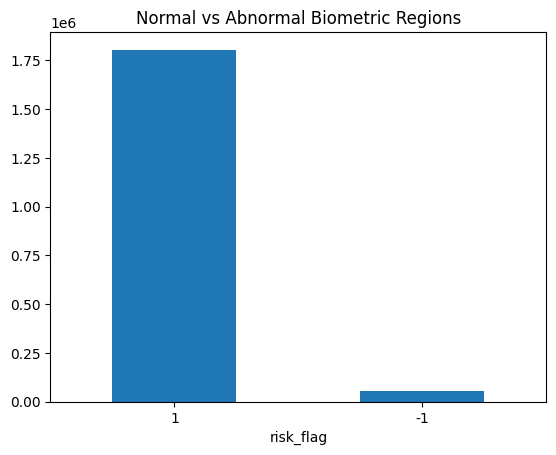

In [17]:
# Anomaly Highlight (ML Output Visualization)

anomaly_counts = bio['risk_flag'].value_counts()

anomaly_counts.plot(
    kind='bar',
    title='Normal vs Abnormal Biometric Regions',
    rot=0
)

## Final Observations

Biometric update activity is not random; it follows clear age-wise, geographic, and temporal patterns.

Biometric system load is concentrated in specific states and districts, rather than being evenly distributed.

Both children (5–17) and adults (17+) contribute significantly to biometric revalidation, indicating lifecycle-wide demand.

Monthly trend analysis reveals predictable peak and low-demand periods, enabling proactive planning.

Machine learning–based anomaly detection successfully identifies regions with abnormal biometric stress, offering early warning capabilities.

## Conclusion

This project demonstrates that Aadhaar biometric update data can be transformed into a powerful decision-support system.
By combining descriptive analytics, temporal trend analysis, geographic segmentation, and machine learning, the study uncovers meaningful societal and operational insights.

Rather than treating biometric updates as isolated events, the analysis shows that biometric demand reflects population behavior, lifecycle transitions, and regional dynamics. These insights enable a shift from reactive system management to predictive, data-driven governance, improving service efficiency and citizen experience.

## Future Scope

District and PIN-level dashboards for real-time biometric stress monitoring.

Integration with population, migration, and economic datasets to enhance contextual understanding.

Advanced time-series forecasting models (ARIMA, Prophet, LSTM) for long-term capacity planning.

Expansion of ML models to predict authentication failure risk, not just update volume.

Policy-level simulation to evaluate the impact of alternative biometric modalities (iris/face-first strategies).

Development of a national biometric health index to guide infrastructure investment and inclusion initiatives.